In [59]:
# import lib
import pandas as pd
import os
import matplotlib.pyplot as plt
import morton
import glob

In [60]:
m = morton.Morton(dimensions=2, bits=18)
def set_value(data,key1,key2):    
    return m.pack(int(data[key1]), int(data[key2]))


In [61]:
def load_data_encode_with_morton(fileName,key1,key2,ts_key,offset=0,multiplier=1):
    df = pd.read_csv(fileName, sep=';', usecols = [ts_key,key1,key2])
    df=df.dropna()
    df[key1]=df[key1].add(offset)
    df[key2]=df[key2].add(offset)
    df[key1]=df[key1].multiply(multiplier)
    df[key2]=df[key2].multiply(multiplier)
    df['morton']=df.apply(set_value,args=(key1,key2),axis=1)
    return df


In [78]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(filePath,key1,key2,ts_key,offset,multiplier,plot_row,plot_column):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    fig, ax = plt.subplots(plot_row,plot_column,figsize=(15, 15),sharex='all')    
    plt.gca().invert_yaxis()
    fig.tight_layout(pad=4.0)
    row_position = 0
    column_position=0
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset,multiplier)
        # print(df)
        ax[row_position,column_position].scatter(x=df['morton'],y=df[ts_key],c='blue',s=0.5)
        ax[row_position,column_position].set_title(file[-5:])
        column_position=column_position+1
        if column_position==plot_column:
            column_position=0
            row_position=row_position+1


In [63]:
LaneChange_Path_5hz='./data/lane_changes/5hz/'

In [64]:
def get_data_infomation(filePath,key1,key2):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    result=[]
    for file in csv_files:
        df = pd.read_csv(file, sep=';', usecols = [key1,key2])
        df=df.dropna()
        result.append([file,df[key1].median(),df[key1].max(),df[key1].min(),df[key2].median(),df[key2].max(),df[key2].min(),max(df[key1].max(),df[key2].max()),min(df[key1].min(),df[key2].min()),max(df[key1].max(),df[key2].max())-min(df[key1].min(),df[key2].min())])
        data_info_df=pd.DataFrame(result,columns=[file,key1+'_median',key1+'_max',key1+'min',key2+'_median',key2+'_max',key2+'min','pair_max','pair_min','max_min_distance'])
    return data_info_df

In [65]:
info=get_data_infomation(LaneChange_Path_5hz,'accel_lon','accel_trans')
info

,./data/lane_changes/5hz/lane_change_4.csv,accel_lon_median,accel_lon_max,accel_lonmin,accel_trans_median,accel_trans_max,accel_transmin,pair_max,pair_min,max_min_distance
0,./data/lane_changes/5hz/lane_change_9.csv,-0.008587,0.432911,-3.531889,0.075069,4.179891,-4.395720,4.179891,-4.395720,8.575611
1,./data/lane_changes/5hz/lane_change_8.csv,0.093746,2.072387,-3.572552,-0.040997,3.996355,-4.329978,3.996355,-4.329978,8.326333
2,./data/lane_changes/5hz/lane_change_1.csv,-0.524073,1.155814,-2.408431,-0.004812,2.792689,-2.826497,2.792689,-2.826497,5.619186
3,./data/lane_changes/5hz/lane_change_3.csv,0.165575,3.112132,-2.797276,-0.050427,1.988155,-1.425109,3.112132,-2.797276,5.909408
4,./data/lane_changes/5hz/lane_change_2.csv,-0.774774,2.211610,-2.351213,0.008071,2.612742,-2.302818,2.612742,-2.351213,4.963955
5,./data/lane_changes/5hz/lane_change_6.csv,0.448694,2.852660,-0.945416,-0.109743,2.254095,-1.314175,2.852660,-1.314175,4.166835
6,./data/lane_changes/5hz/lane_change_7.csv,0.383956,3.245280,-3.603011,-0.124821,1.424391,-1.740912,3.245280,-3.603011,6.848291
7,./data/lane_changes/5hz/lane_change_5.csv,-0.387798,1.537621,-2.015111,0.036819,1.750094,-1.571335,1.750094,-2.015111,3.765205
8,./data/lane_changes/5hz/lane_change_4.csv,-0.169443,3.009628,-2.440711,-0.029358,1.712458,-1.644797,3.009628,-2.440711,5.450339


In [66]:
offset_lowboundry=max(info['max_min_distance'])
offset_lowboundry

8.575610999999999

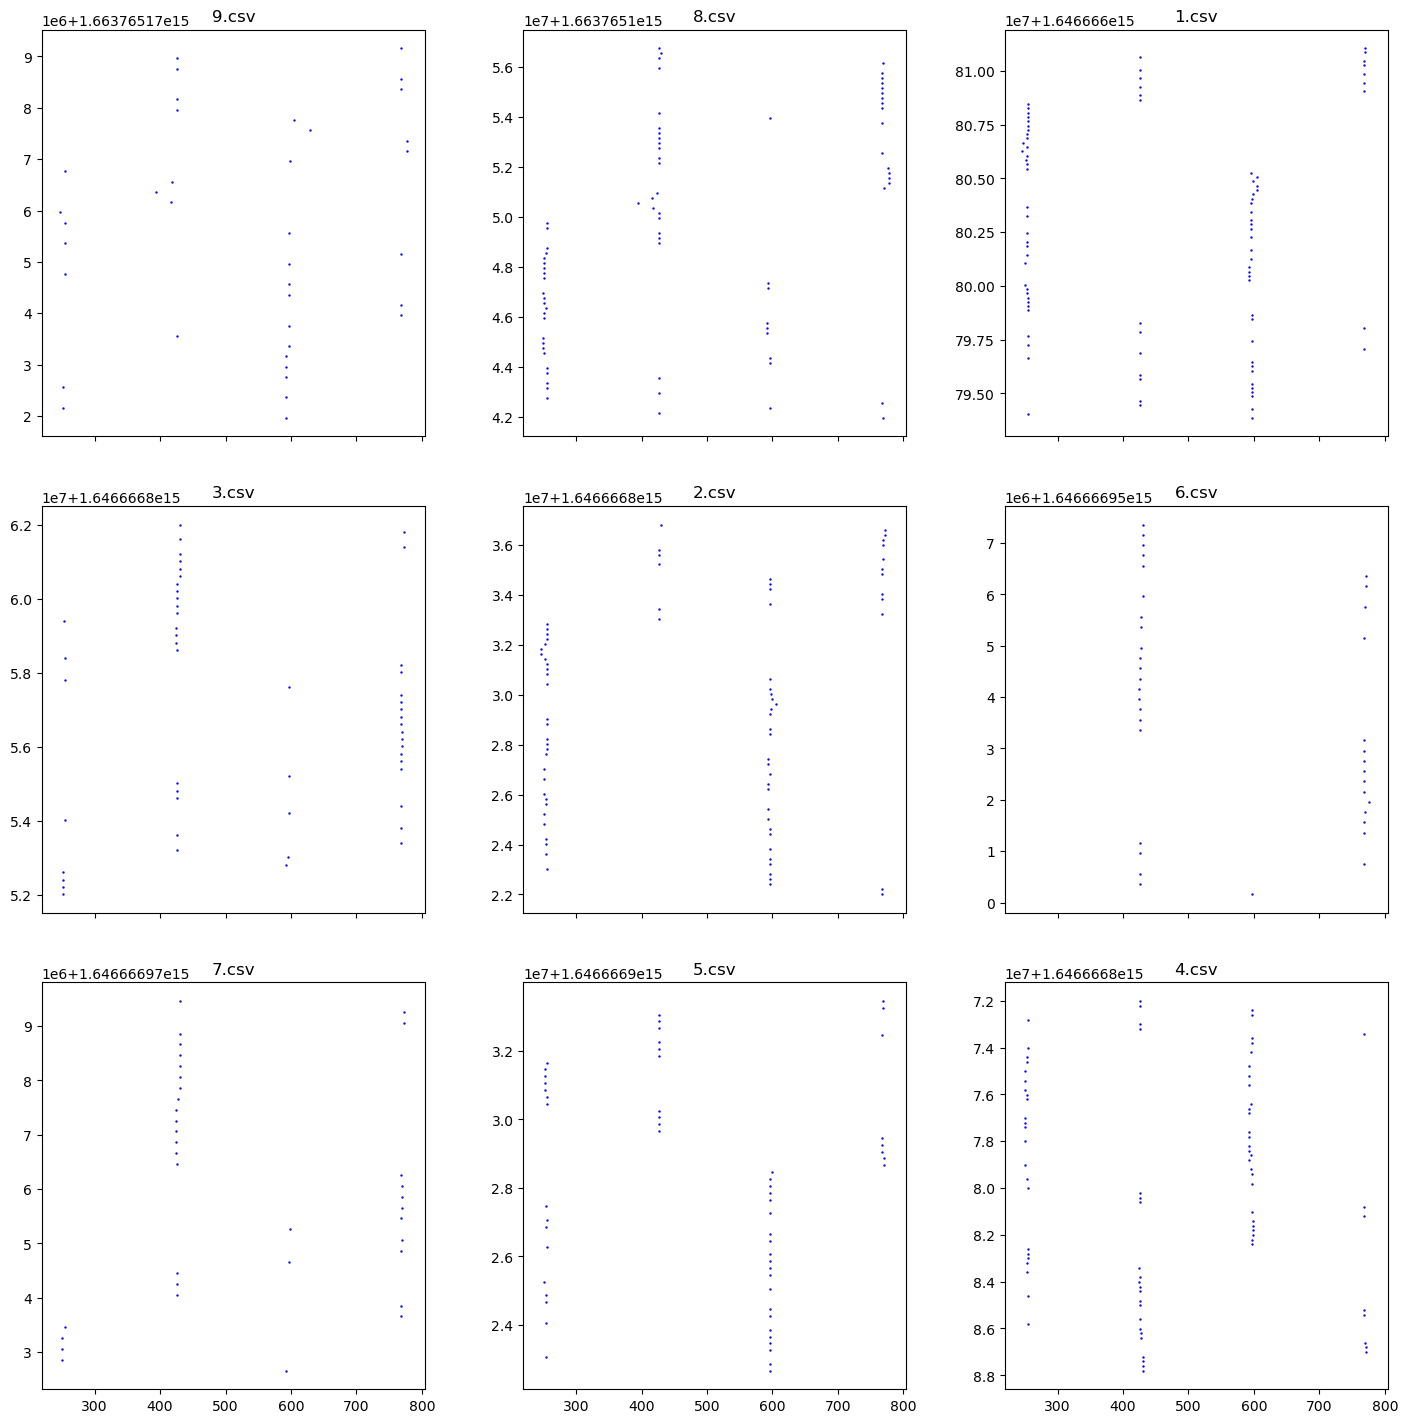

In [79]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',16,1,3,3)

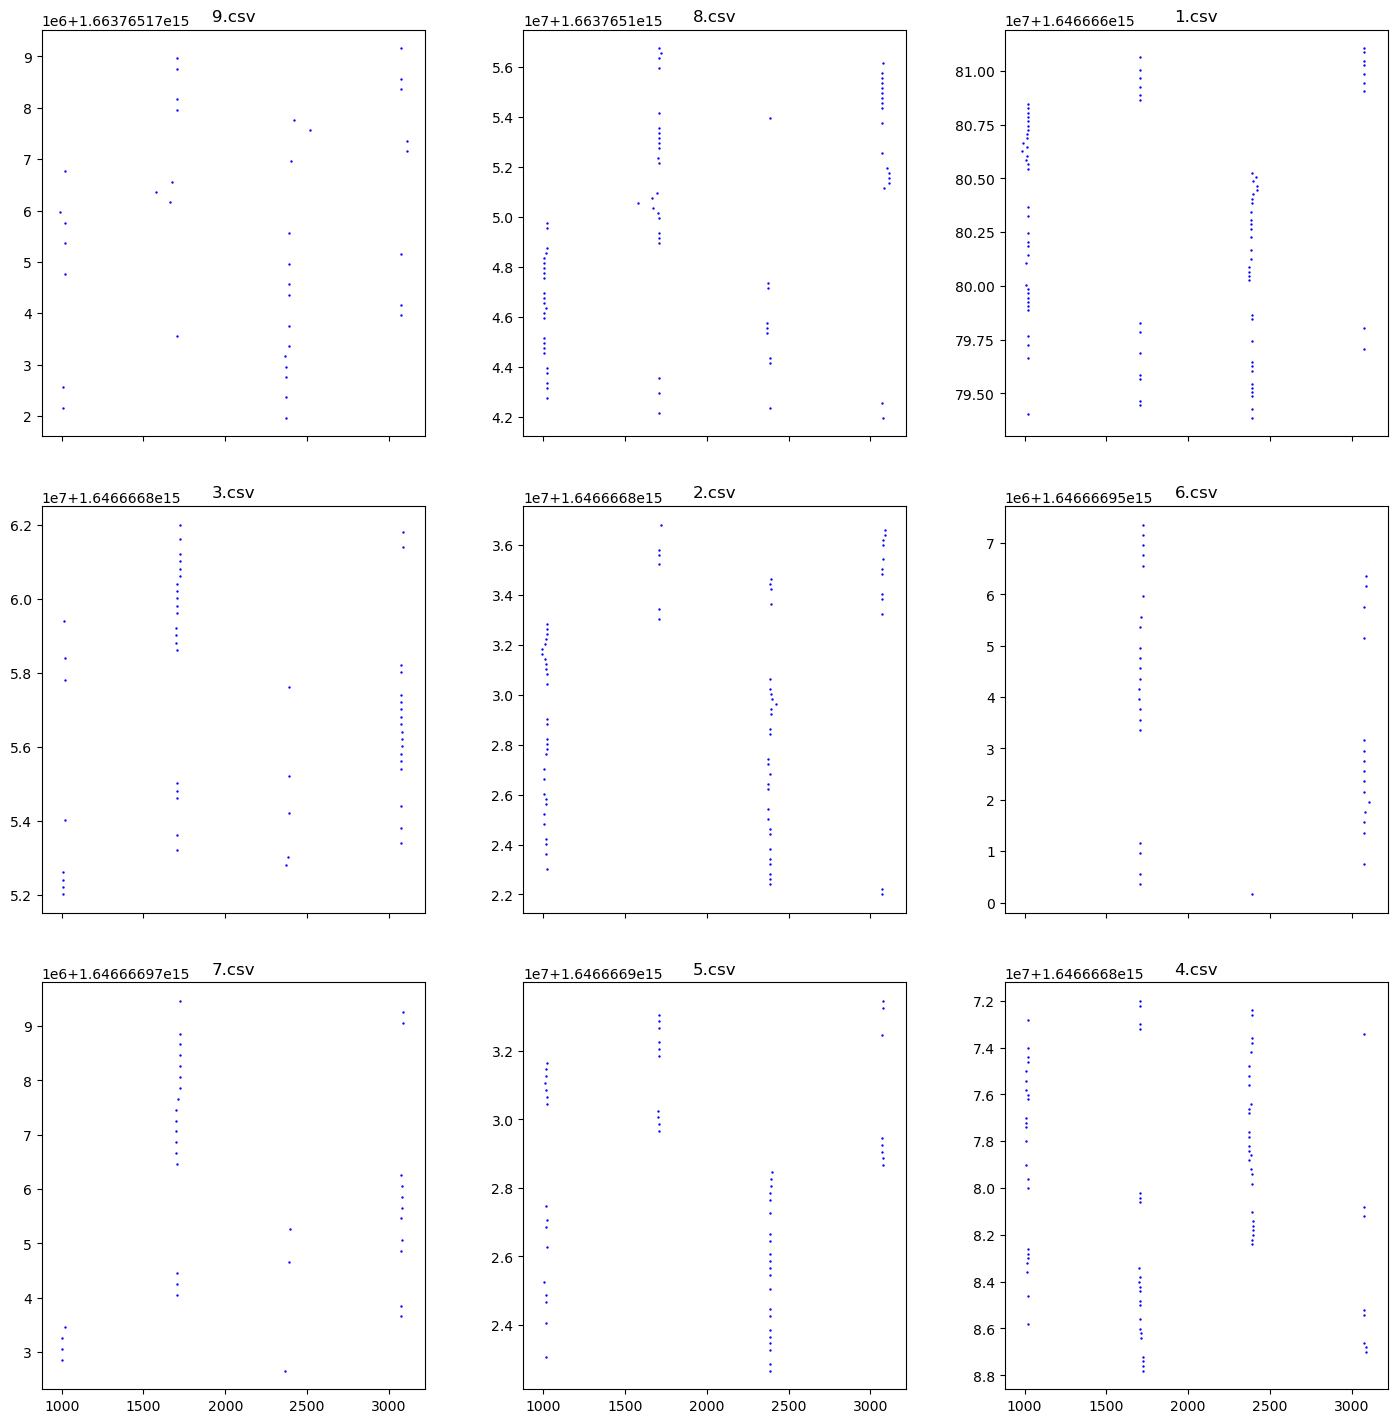

In [68]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',16,2,3,3)

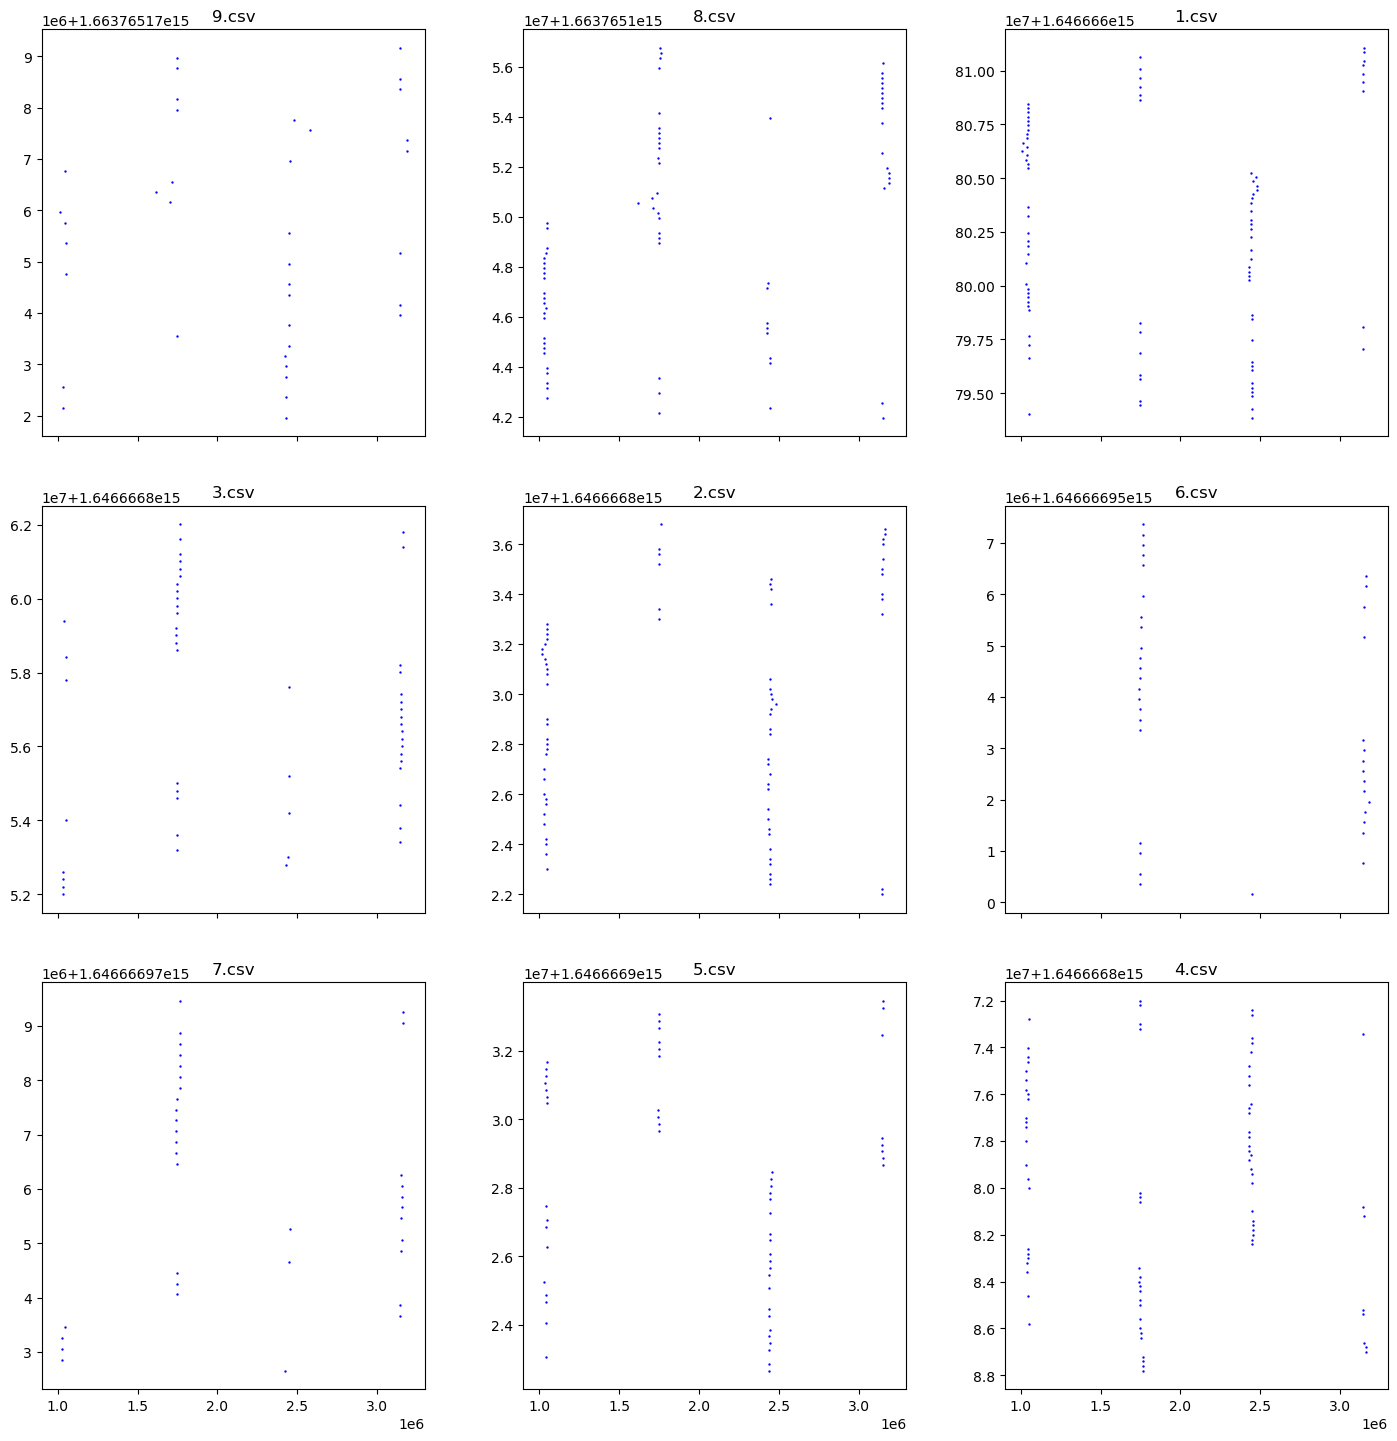

In [69]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',16,64,3,3)

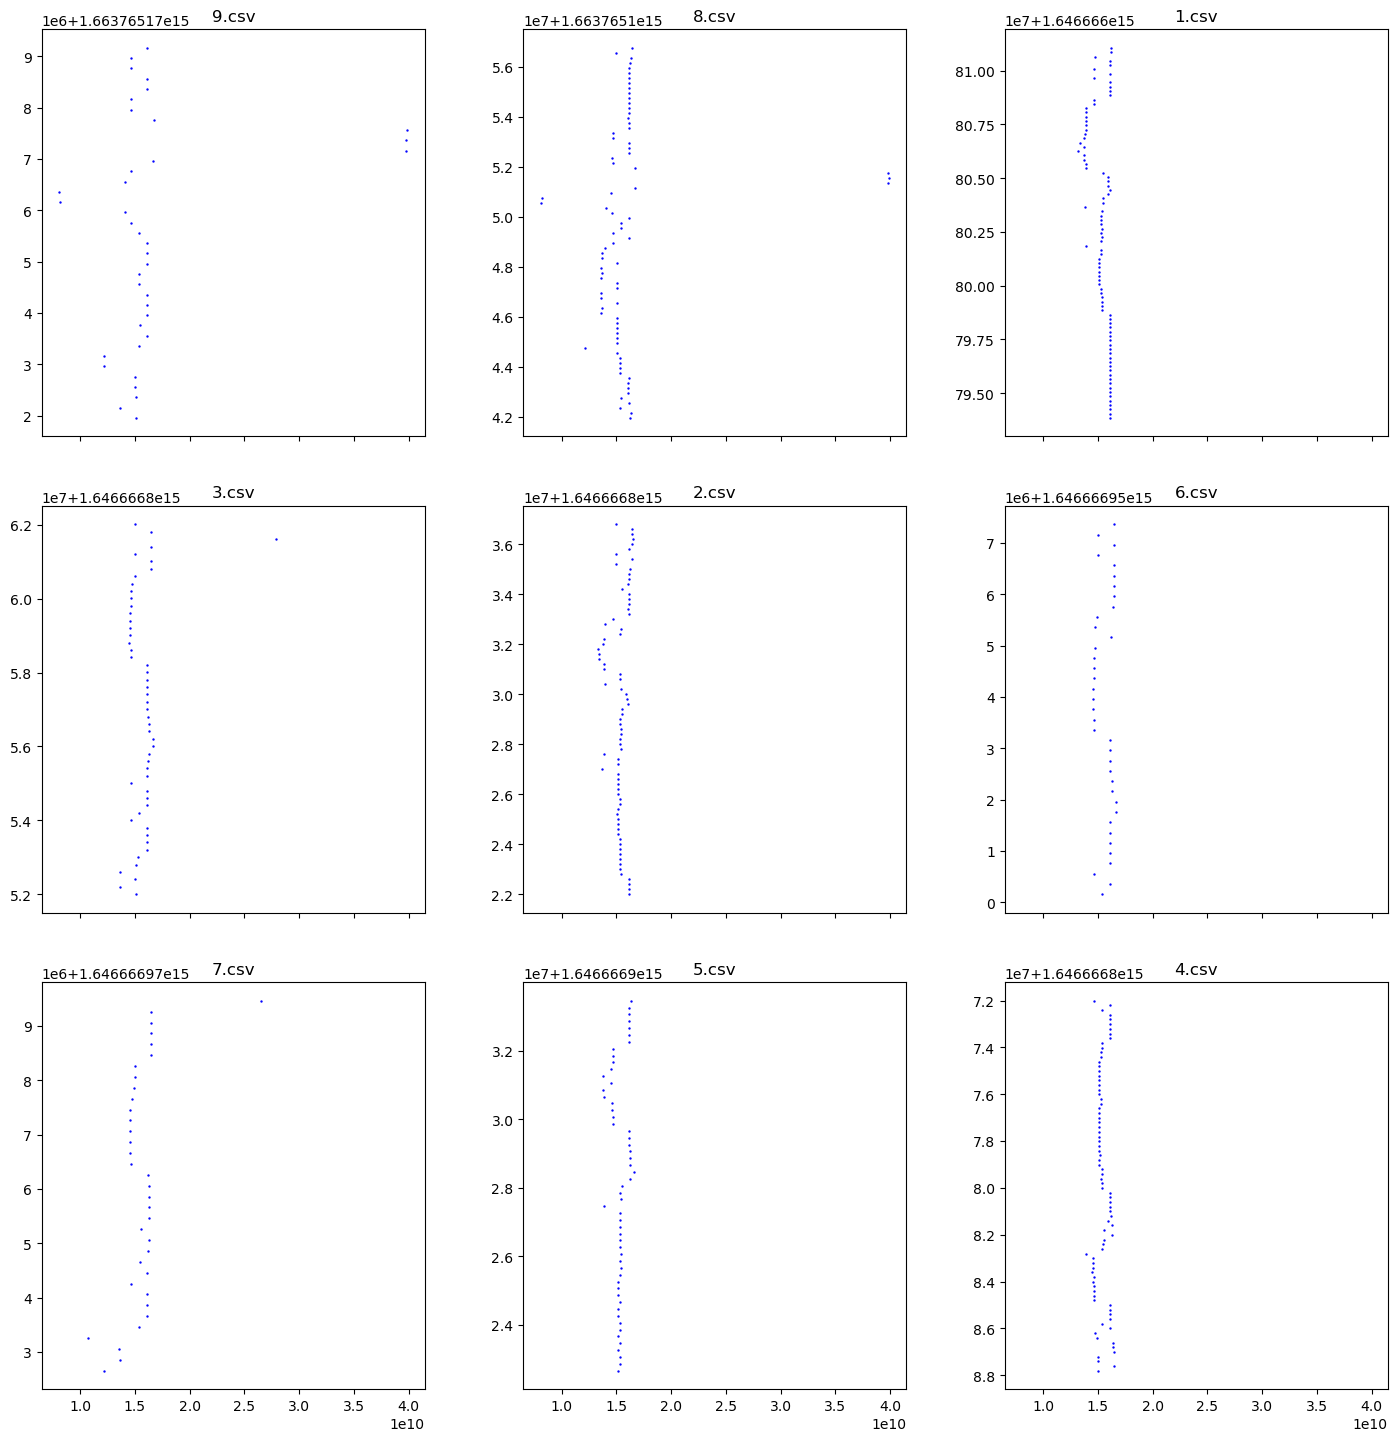

In [70]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',10,10000,3,3)

In [71]:
def load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_AllInOne(filePath,key1,key2,ts_key,offset,multiplier,colors,shapes):
    csv_files = glob.glob(os.path.join(filePath, "*.csv"))
    plt.gca().invert_yaxis()
    plot_index=0
    color_index = 0
    for file in csv_files:
        # print(file)
        # get dataframe with morton
        df = load_data_encode_with_morton(file,key1,key2,ts_key,offset,multiplier)
        # print(df)
        plt.scatter(x=df['morton'],y=df.index,marker=shapes[plot_index], color=colors[color_index]) 
        plot_index= plot_index+1
        if plot_index==len(shapes)-1:
            color_index=color_index+1
            plot_index=0
        
        

In [72]:
markers = ["." , "," , "o" ]
colors = ['r','g','b','c','m', 'y', 'k']

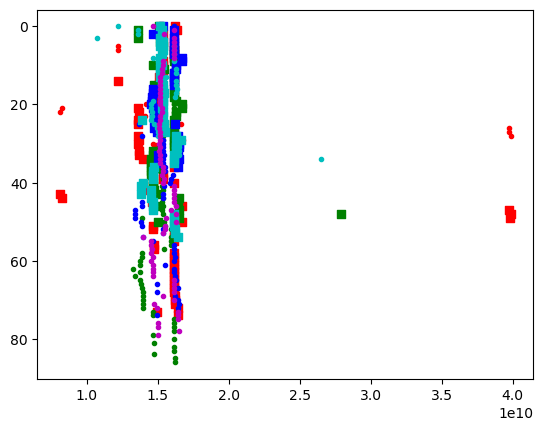

In [73]:
load_All_Files_In_Subfolder_Encode_with_Morton_and_plot_AllInOne(LaneChange_Path_5hz,'accel_lon','accel_trans','ts',10,10000,colors,markers)